In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [322]:
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Filtering out rows where latency or energy is infinity
data = data[(data['latency'] != float('inf')) & (data['energy'] != float('inf'))]

raw_data = data.copy()

# Scale energy and latency for each configuration
for config in data['config'].unique():
    # Extract rows for the current configuration
    config_data = data[data['config'] == config]

    # Scale energy and latency
    data.loc[data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_data = data[data['generations'] == 200].copy()
gen_200_raw_data = raw_data[raw_data['generations'] == 200].copy()

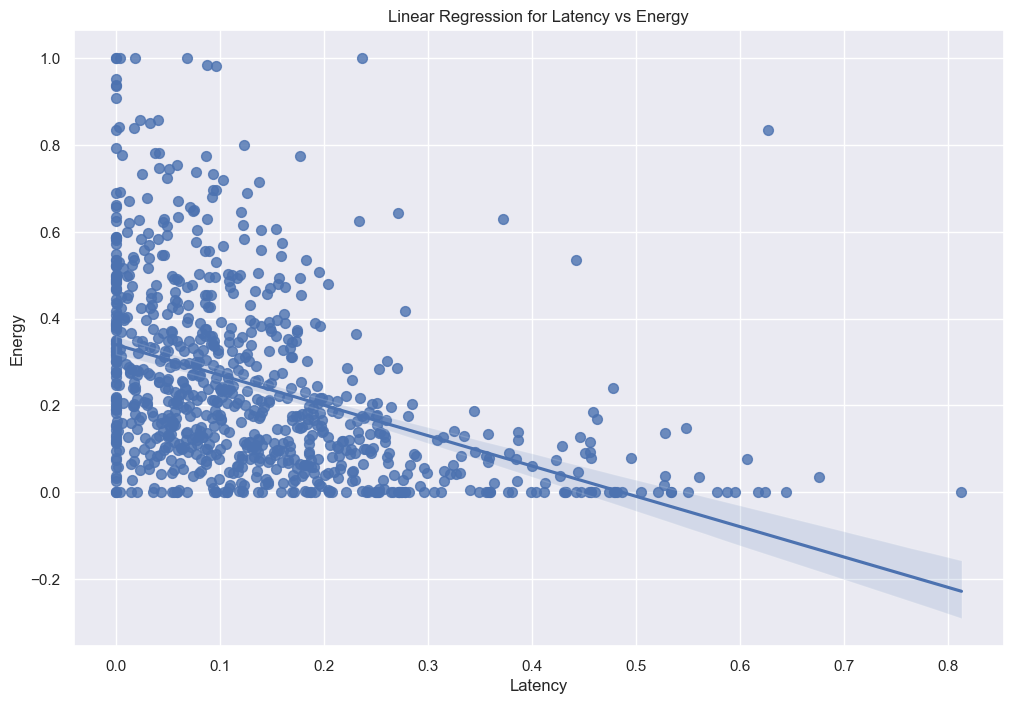

In [323]:
# Creating a scatter plot with a linear regression line for the newest data
plt.figure(figsize=(12, 8))
sns.regplot(x='latency', y='energy', data=gen_200_data, scatter_kws={'s':50})
plt.title('Linear Regression for Latency vs Energy')
plt.xlabel('Latency')
plt.ylabel('Energy')
plt.show()

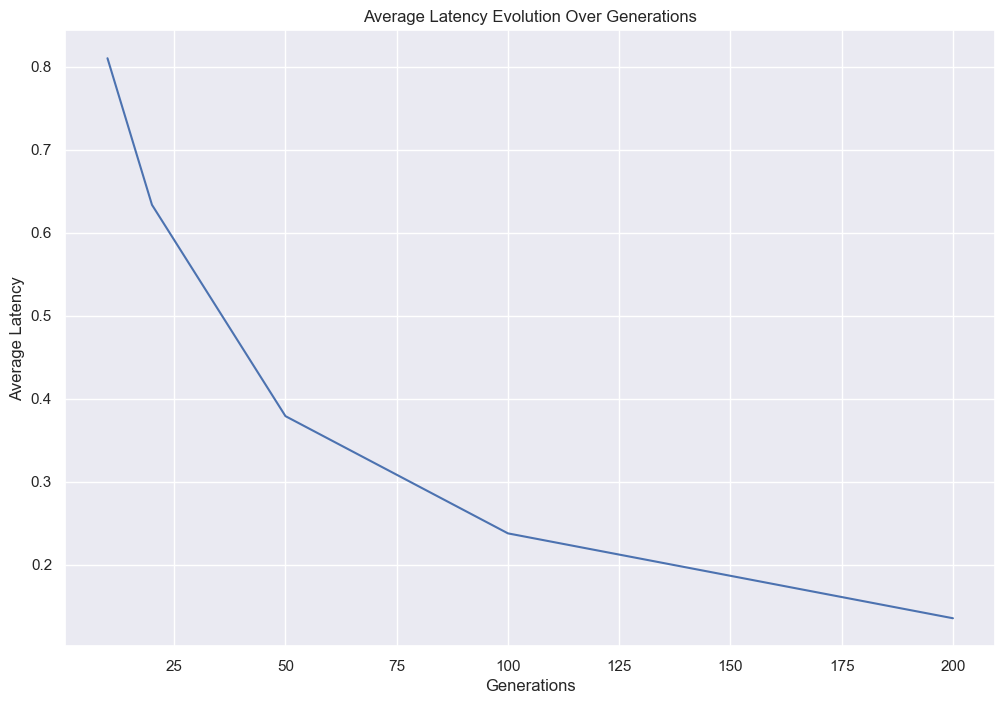

In [324]:
# Calculating the average latency for each generation
avg_latency_per_generation = data.groupby('generations')['latency'].mean().reset_index()

# Creating a line chart to show how latency evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='latency', data=avg_latency_per_generation)
plt.title('Average Latency Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Latency')
plt.show()

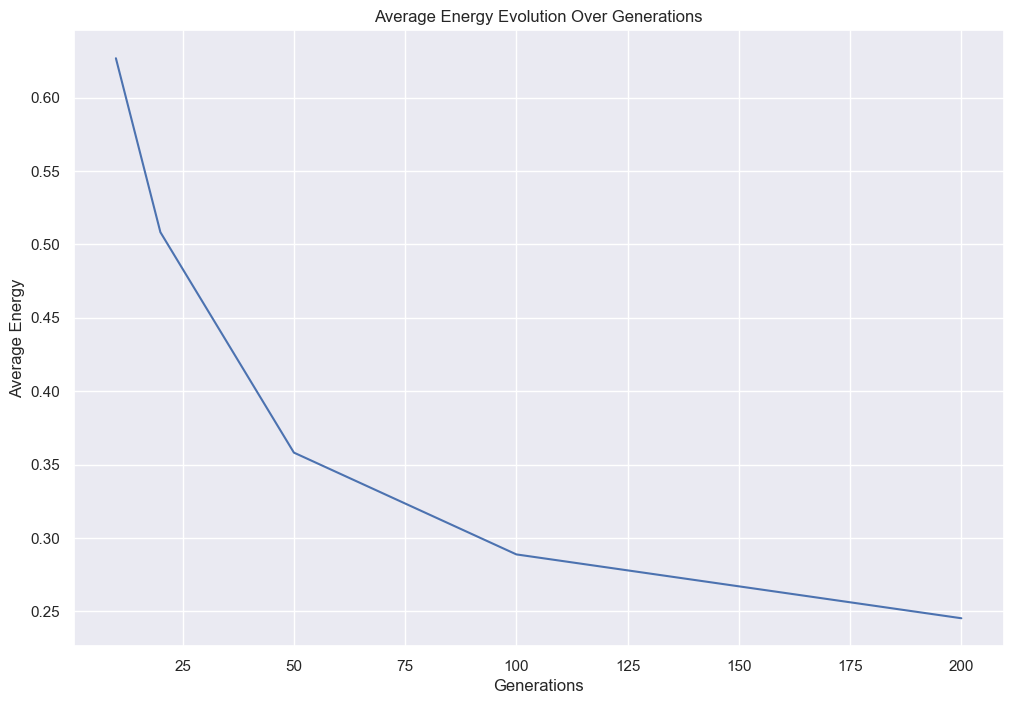

In [325]:
# Calculating the average energy for each generation
avg_energy_per_generation = data.groupby('generations')['energy'].mean().reset_index()

# Creating a line chart to show how energy evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='energy', data=avg_energy_per_generation)
plt.title('Average Energy Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Energy')
plt.show()

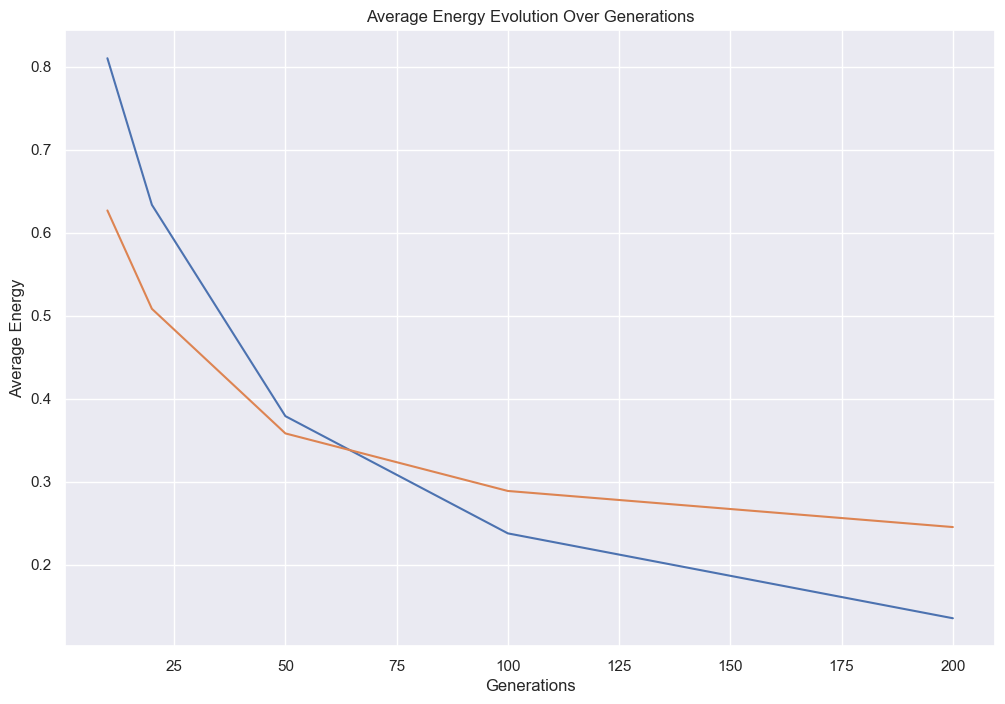

In [326]:
# Creating a line chart to show how energy evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='latency', data=avg_latency_per_generation)
sns.lineplot(x='generations', y='energy', data=avg_energy_per_generation)
plt.title('Average Energy Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Energy')
plt.show()

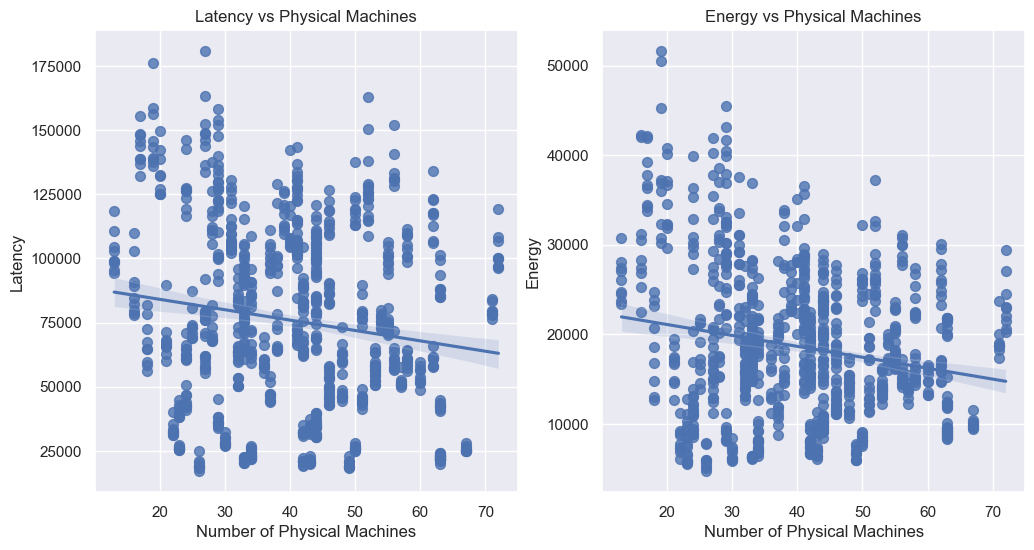

In [327]:
# Latency vs physical_machines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='physical_machines', y='latency', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Latency vs Physical Machines')
plt.xlabel('Number of Physical Machines')
plt.ylabel('Latency')

plt.subplot(1, 2, 2)
sns.regplot(x='physical_machines', y='energy', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Energy vs Physical Machines')
plt.xlabel('Number of Physical Machines')
plt.ylabel('Energy')
plt.show()

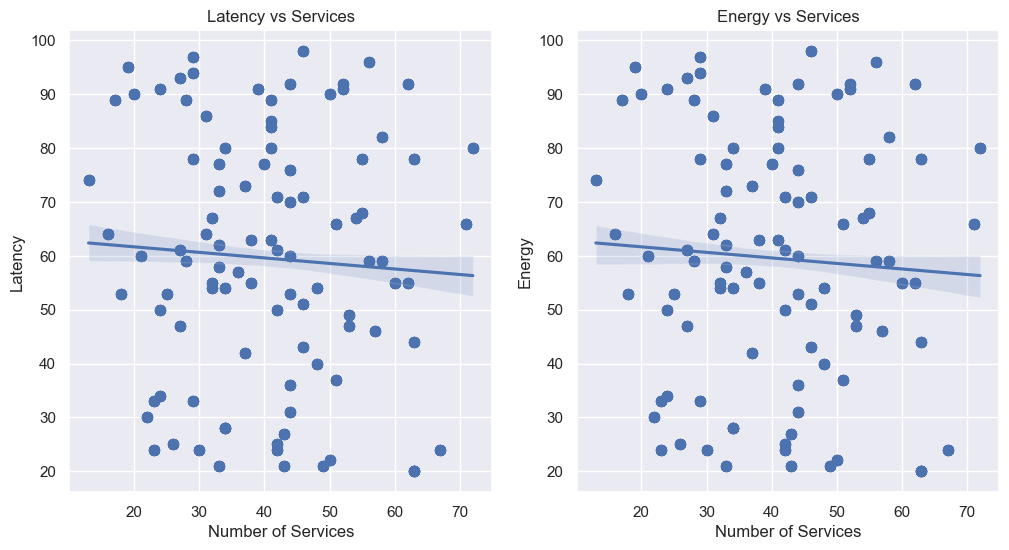

In [328]:
# Latency vs physical_machines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='physical_machines', y='services', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Latency vs Services')
plt.xlabel('Number of Services')
plt.ylabel('Latency')

plt.subplot(1, 2, 2)
sns.regplot(x='physical_machines', y='services', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Energy vs Services')
plt.xlabel('Number of Services')
plt.ylabel('Energy')
plt.show()

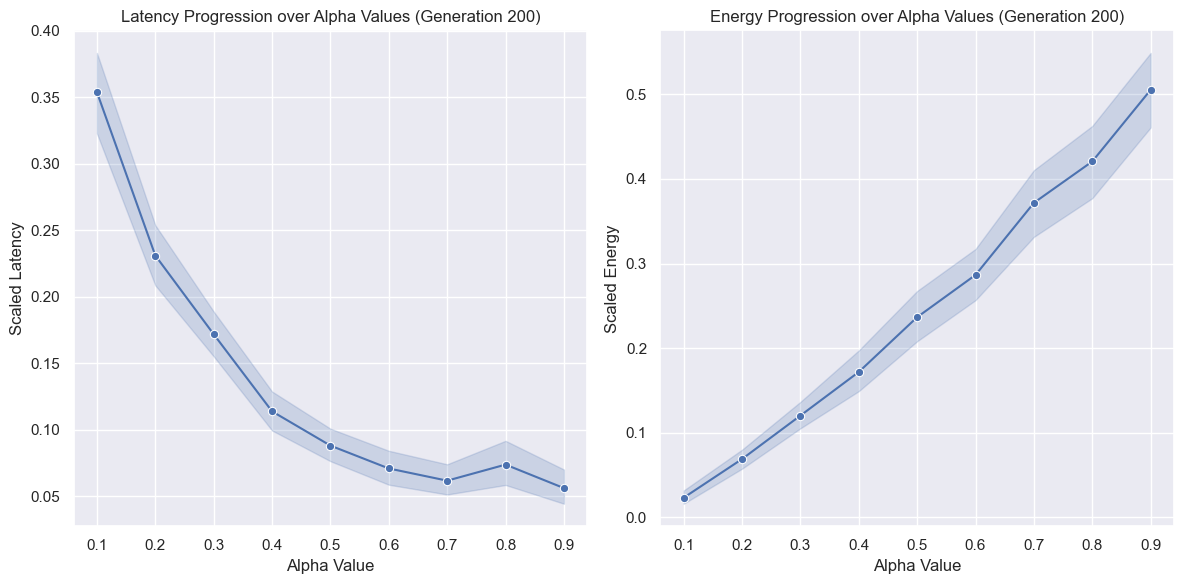

In [329]:
# Line chart for Latency over alpha values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='alpha', y='latency', data=gen_200_data, marker='o')
plt.title('Latency Progression over Alpha Values (Generation 200)')
plt.xlabel('Alpha Value')
plt.ylabel('Scaled Latency')

# Line chart for Energy over alpha values
plt.subplot(1, 2, 2)
sns.lineplot(x='alpha', y='energy', data=gen_200_data, marker='o')
plt.title('Energy Progression over Alpha Values (Generation 200)')
plt.xlabel('Alpha Value')
plt.ylabel('Scaled Energy')
plt.tight_layout()
plt.show()

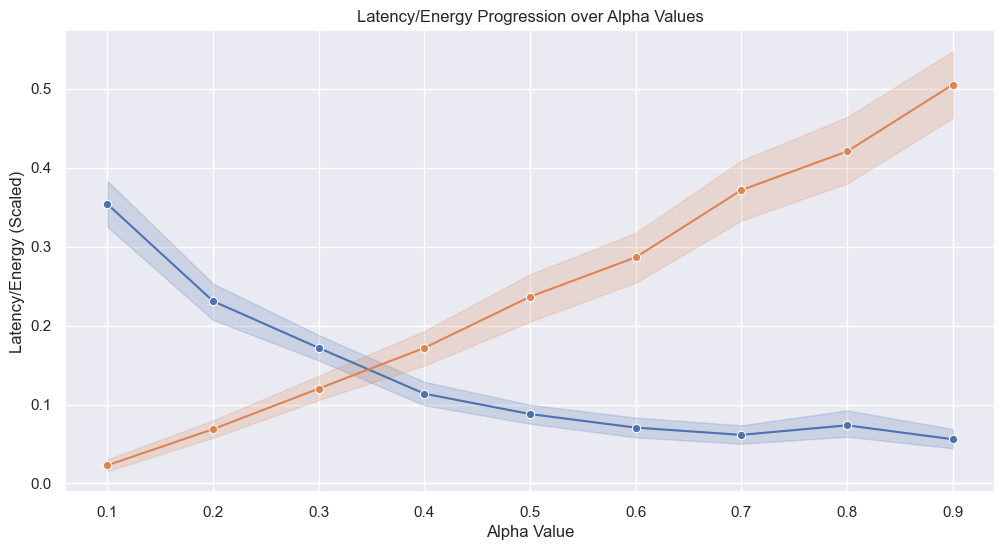

In [330]:
# Line chart for Latency over alpha values
plt.figure(figsize=(12, 6))
sns.lineplot(x='alpha', y='latency', data=gen_200_data, marker='o')
sns.lineplot(x='alpha', y='energy', data=gen_200_data, marker='o')
plt.title('Latency/Energy Progression over Alpha Values')
plt.xlabel('Alpha Value')
plt.ylabel('Latency/Energy (Scaled)')
plt.show()

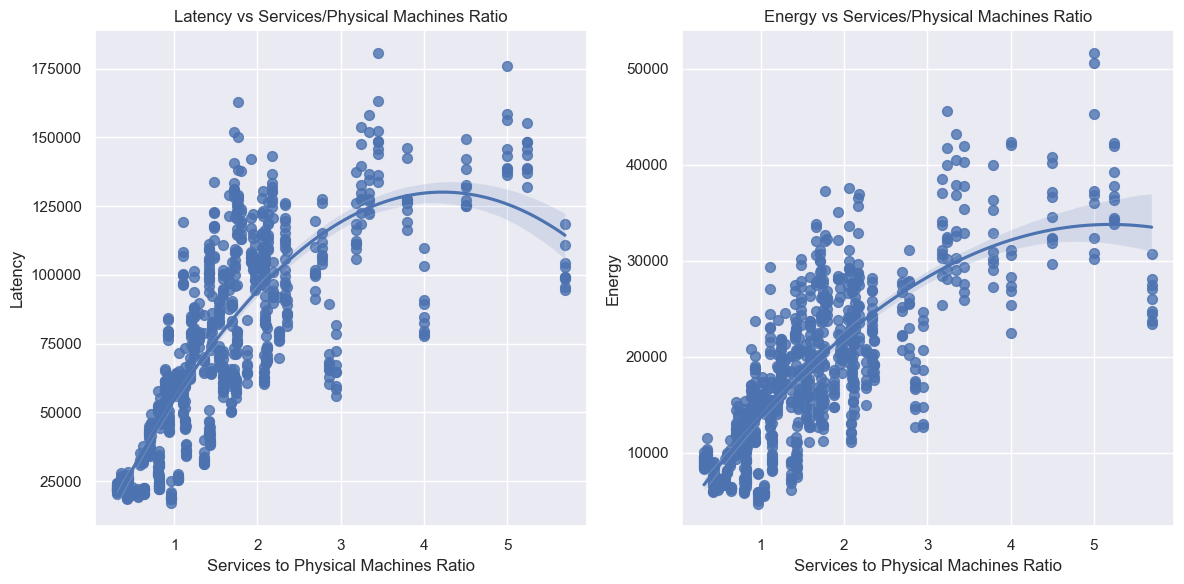

In [331]:
# Calculate the ratio of services to physical machines
gen_200_raw_data['services_to_physical_ratio'] = gen_200_raw_data['services'] / gen_200_raw_data['physical_machines']

plt.figure(figsize=(12, 6))

# Plotting Latency vs Services/Physical Machines Ratio
plt.subplot(1, 2, 1)
sns.regplot(x='services_to_physical_ratio', y='latency', data=gen_200_raw_data, order=2, scatter_kws={'s':50})
plt.title('Latency vs Services/Physical Machines Ratio')
plt.xlabel('Services to Physical Machines Ratio')
plt.ylabel('Latency')

# Plotting Energy vs Services/Physical Machines Ratio
plt.subplot(1, 2, 2)
sns.regplot(x='services_to_physical_ratio', y='energy', data=gen_200_raw_data, order=2, scatter_kws={'s':50})
plt.title('Energy vs Services/Physical Machines Ratio')
plt.xlabel('Services to Physical Machines Ratio')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()

In [332]:
file_path = 'results_cloud.csv'
cloud_data = pd.read_csv(file_path)

# Filtering out rows where latency or energy is infinity
cloud_data = cloud_data[(cloud_data['latency'] != float('inf')) & (cloud_data['energy'] != float('inf'))]

raw_cloud_data = cloud_data.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale energy and latency for each configuration
for config in cloud_data['config'].unique():
    # Extract rows for the current configuration
    config_data = cloud_data[cloud_data['config'] == config]

    # Scale energy and latency
    cloud_data.loc[cloud_data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_cloud_data = cloud_data[cloud_data['generations'] == 200].copy()
gen_200_raw_cloud_data = raw_cloud_data[raw_cloud_data['generations'] == 200].copy()

In [333]:
file_path = 'results_edge.csv'
edge_data = pd.read_csv(file_path)

# Filtering out rows where latency or energy is infinity
edge_data = edge_data[(edge_data['latency'] != float('inf')) & (edge_data['energy'] != float('inf'))]

raw_edge_data = edge_data.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale energy and latency for each configuration
for config in edge_data['config'].unique():
    # Extract rows for the current configuration
    config_data = edge_data[edge_data['config'] == config]

    # Scale energy and latency
    edge_data.loc[edge_data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_edge_data = edge_data[edge_data['generations'] == 200].copy()
gen_200_raw_edge_data = raw_edge_data[raw_edge_data['generations'] == 200].copy()

In [334]:
# Merging the three dataframes on the 'config' column
combined_row_data = pd.merge(gen_200_raw_data[['config','alpha', 'beta', 'latency', 'energy']], 
                             gen_200_raw_cloud_data[['config', 'alpha', 'beta', 'latency', 'energy']], 
                             on=['config', 'alpha', 'beta'], suffixes=('', '_cloud'))

combined_row_data = pd.merge(combined_row_data, 
                             gen_200_raw_edge_data[['config', 'alpha', 'beta', 'latency', 'energy']], 
                             on=['config', 'alpha', 'beta'], suffixes=('', '_edge'))

combined_row_data

,config,alpha,beta,latency,energy,latency_cloud,energy_cloud,latency_edge,energy_edge
0,config-1,0.1,0.9,27993.536031,9451.252082,127125.453760,7956.952284,21965.311210,12631.565567
1,config-1,0.2,0.8,26194.588958,9509.483492,121280.138074,8970.804965,21448.652997,12689.819337
2,config-1,0.3,0.7,25292.380640,9812.872623,121280.138074,8970.804965,20878.944991,12843.018995
3,config-1,0.4,0.6,24905.999117,9754.117077,121280.138074,8970.804965,20859.329344,12848.227845
4,config-1,0.5,0.5,26778.734228,10105.622758,121280.138074,8970.804965,20614.114684,13025.988437
...,...,...,...,...,...,...,...,...,...
869,config-100,0.5,0.5,46401.013830,12057.628528,185963.354142,10008.309707,27465.390036,17367.525117
870,config-100,0.6,0.4,45299.492061,11610.891387,176458.926450,11092.021139,26190.746382,18860.422931
871,config-100,0.7,0.3,45679.308937,13648.696209,176452.463100,11088.171356,24760.716480,20803.808037
872,config-100,0.8,0.2,42855.061137,16238.318489,175834.780617,12310.749247,22834.669299,27356.463540


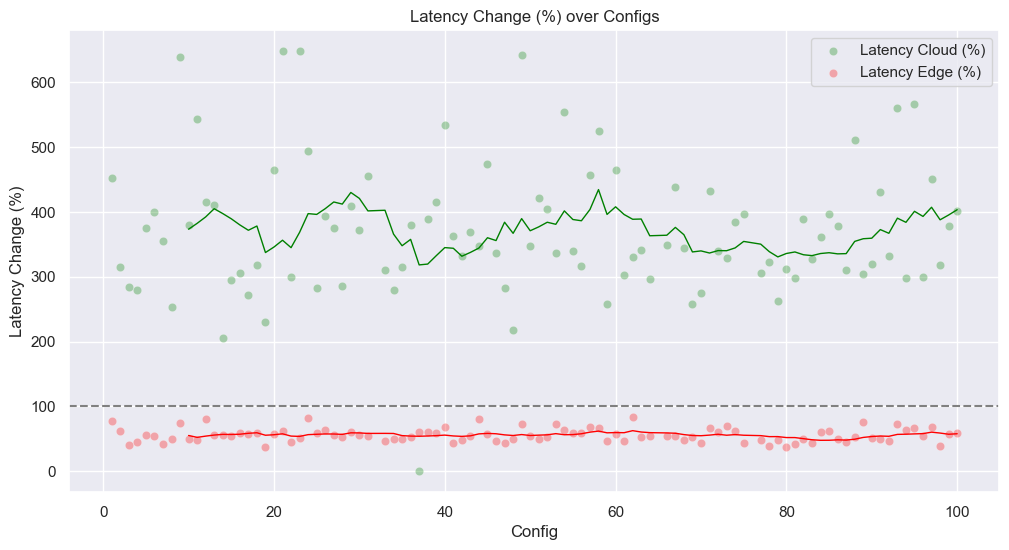

In [345]:
# Filtering the data for alpha = 0.5 and beta = 0.5
alpha_beta_filtered_data = combined_row_data[(combined_row_data['alpha'] == 0.5) & (combined_row_data['beta'] == 0.5)].copy()

# Calculating latency_cloud and latency_edge as a percentage of latency
alpha_beta_filtered_data['latency_cloud_percent'] = (alpha_beta_filtered_data['latency_cloud'] / alpha_beta_filtered_data['latency']) * 100
alpha_beta_filtered_data['latency_edge_percent'] = (alpha_beta_filtered_data['latency_edge'] / alpha_beta_filtered_data['latency']) * 100

# Extracting config number from the 'config' column
alpha_beta_filtered_data['config_number'] = alpha_beta_filtered_data['config'].str.extract('(\d+)').astype(int)

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='latency_cloud_percent', data=alpha_beta_filtered_data, label='Latency Cloud (%)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='latency_edge_percent', data=alpha_beta_filtered_data, label='Latency Edge (%)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['latency_cloud_percent'].rolling(window=window_size).mean(), data=alpha_beta_filtered_data, color='green', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['latency_edge_percent'].rolling(window=window_size).mean(), data=alpha_beta_filtered_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

plt.title('Latency Change (%) over Configs')
plt.xlabel('Config')
plt.ylabel('Latency Change (%)')
plt.legend()
plt.show()

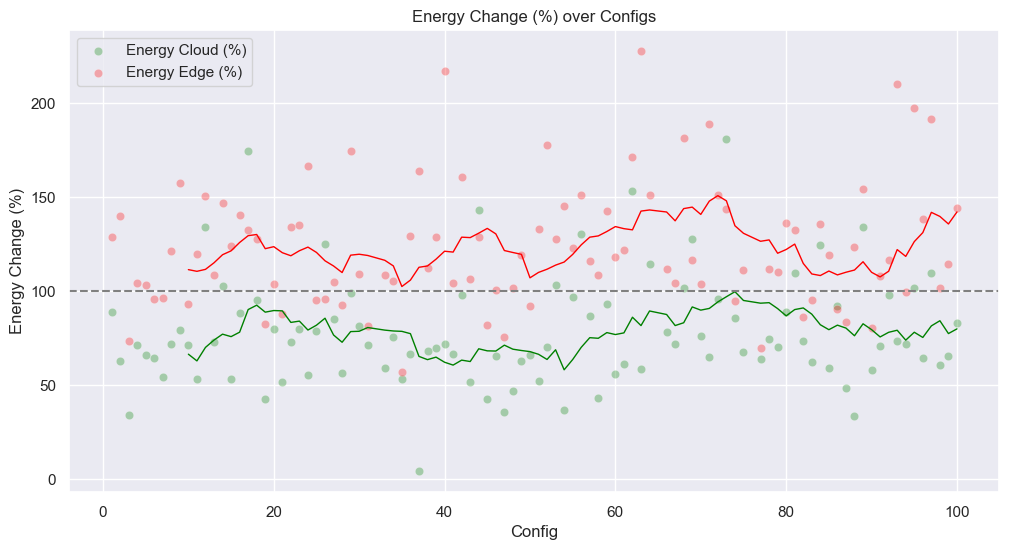

In [344]:
# Calculating energy_cloud and energy_edge as a percentage of energy
alpha_beta_filtered_data['energy_cloud_percent'] = (alpha_beta_filtered_data['energy_cloud'] / alpha_beta_filtered_data['energy']) * 100
alpha_beta_filtered_data['energy_edge_percent'] = (alpha_beta_filtered_data['energy_edge'] / alpha_beta_filtered_data['energy']) * 100

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='energy_cloud_percent', data=alpha_beta_filtered_data, label='Energy Cloud (%)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='energy_edge_percent', data=alpha_beta_filtered_data, label='Energy Edge (%)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['energy_cloud_percent'].rolling(window=window_size).mean(), data=alpha_beta_filtered_data, color='green', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['energy_edge_percent'].rolling(window=window_size).mean(), data=alpha_beta_filtered_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

plt.title('Energy Change (%) over Configs')
plt.xlabel('Config')
plt.ylabel('Energy Change (%)')
plt.legend()
plt.show()